# Price Prediction
In this section we should predict the price of cellphones based on data we have. 


First, we are going to import our required packages, import data and split tain and test
 

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [187]:
df = pd.read_csv('../data.csv')
df.head()

,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,...,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0
2,2,alcatel 1 (2021),alcatel,True,True,True,False,2021.0,Available,134.0,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),"GSM / HSPA / LTE HSPA 42.2/11.5 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1.0,8.0
3,3,alcatel 3l (2021),alcatel,True,True,True,False,2021.0,Available,194.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",64GB 4GB RAM,microSDXC (only single sim model),4.0,64.0
4,4,alcatel 1s (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",32GB 3GB RAM,microSDXC (uses shared SIM slot),3.0,32.0


In [81]:
df.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [82]:
df.describe()

,Unnamed: 0,Announced,Weight,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2495.184081,2016.577518,190.389325,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,1290.683411,3.656827,97.208564,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,0.000000,2010.000000,89.300000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,1450.000000,2014.000000,140.100000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2455.000000,2016.000000,167.000000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,3681.000000,2020.000000,195.000000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,4678.000000,2024.000000,950.000000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


Spliting Test and Train Data

In [188]:
target = df['Price']
df.drop('Price', axis=1, inplace=True)

In [189]:
X_train, X_test, y_train, t_test = train_test_split(df, target, test_size=0.15, random_state=42)

split Train and Validation dataset

### 1. EDA & Pre-Processing

Now we are going to have a small overview on our train data

In [159]:
X_train.shape

(2253, 36)

In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 1313 to 860
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2253 non-null   int64  
 1   name              2253 non-null   object 
 2   brand             2253 non-null   object 
 3   2G                2253 non-null   bool   
 4   3G                2253 non-null   bool   
 5   4G                2253 non-null   bool   
 6   5G                2253 non-null   bool   
 7   Announced         2253 non-null   float64
 8   Status            2253 non-null   object 
 9   Weight            2253 non-null   float64
 10  Length            2253 non-null   object 
 11  Width             2253 non-null   object 
 12  Diameter          2253 non-null   object 
 13  SIM               2253 non-null   object 
 14  Display Type      2253 non-null   object 
 15  Display Size      2253 non-null   float64
 16  ppi               2253 non-null   float64
 17

In [9]:
X_train.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [120]:
X_train['Unnamed: 0'].value_counts()

Unnamed: 0
2438    1
189     1
1634    1
2069    1
788     1
       ..
3963    1
4323    1
4345    1
2752    1
1707    1
Name: count, Length: 2253, dtype: int64

Due to its variety, It seems like This column is not very Useful. So, we are going to remove this column.

In [121]:
X_train['name'].value_counts()

name
lg optimus vu p895             1
alcatel ot 988 shockwave       1
huawei nova plus               1
lenovo vibe p1                 1
blu studio x9 hd               1
                              ..
samsung galaxy m02             1
samsung galaxy light           1
samsung galaxy exhibit t599    1
nokia 7 1                      1
huawei ascend g700             1
Name: count, Length: 2253, dtype: int64

For the same reason, this column is useless too. So, we are going to remove this column.

In [122]:
X_train.brand.value_counts()

brand
samsung    443
xiaomi     244
huawei     240
lg         197
zte        177
htc        177
lenovo     142
nokia      130
blu        124
sony       100
alcatel     98
asus        91
apple       57
infinix     33
Name: count, dtype: int64

<Axes: >

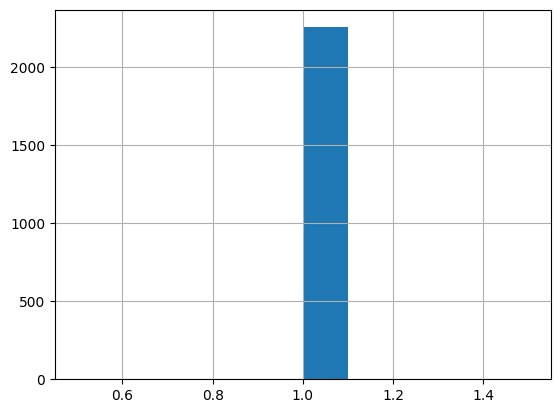

In [123]:
X_train['2G'].hist()

It looks like this column is 1 for all of our data. So, It is not useful for our decision tree and we can remove it 

<Axes: >

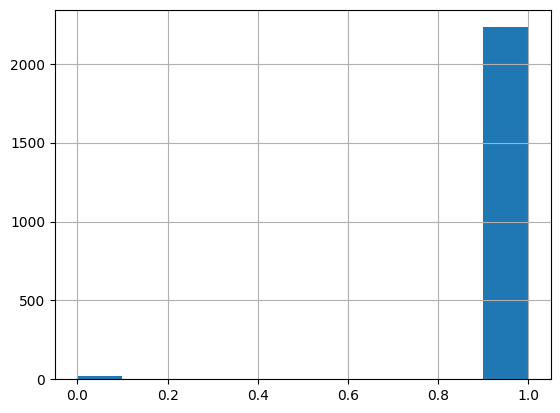

In [124]:
X_train['3G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

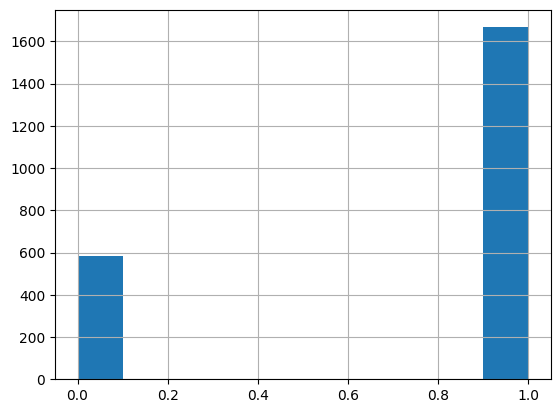

In [15]:
X_train['4G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

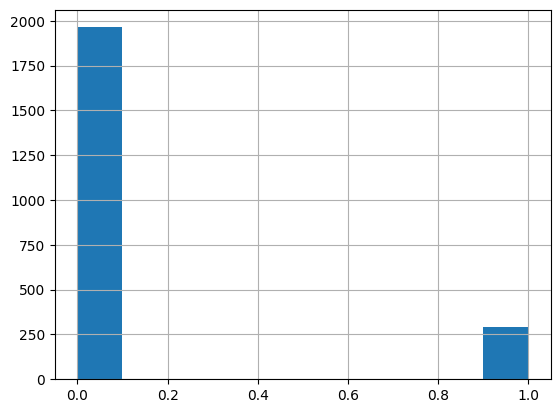

In [16]:
X_train['5G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

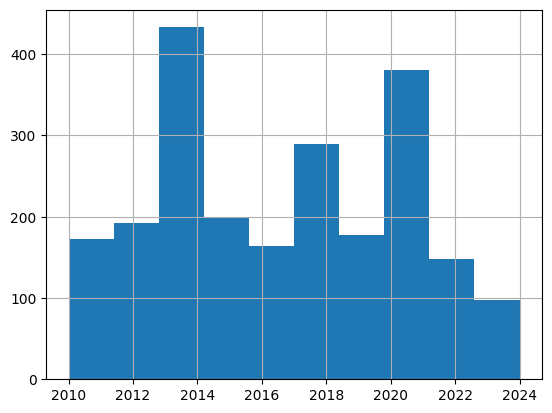

In [17]:
X_train['Announced'].hist()

In [18]:
X_train['Status'].value_counts()


Status
Discontinued    1162
Available       1088
Coming             3
Name: count, dtype: int64

In [125]:
X_train['Weight'].value_counts()

Weight
160.0    48
150.0    45
130.0    43
145.0    40
135.0    34
         ..
426.0     1
142.5     1
141.8     1
404.0     1
615.0     1
Name: count, Length: 430, dtype: int64

The variety of Weight is a lot. so we can round them up to the nearest multiple of ten. 

As the variety of Length and Width is a lot, we present a formula to combine these two elements. we can use these two to compute the area of a cellphone. but befor that, we will round the amount of them up to the nearest multiple of ten. 

But unfortunetly there is a problem in these data and not all of them are float! so, we should correct them with 'toFloat' function

In [161]:
def toFloat(x):
    try:
        return float(x)
    except:
        try:
            return float(x.split(' ')[1])
        except:
            return float(x.split(' ')[0])

'area' is very diverse and will be usefull for our work

Diameter will be processed as well as Length and Width. but instead we will round them to the nearest multiple of 5

In [162]:
def DtoFloat(x):
    try:
        return float(x)
    except:
        return float(x.split('-')[1].strip())

In [129]:
X_train['SIM'].value_counts()

SIM
Nano-SIM     1221
Micro-SIM     542
Mini-SIM      406
eSIM           84
Name: count, dtype: int64

'SIM' column has will be used as it is.

In [130]:
X_train['Display Type'].value_counts()

Display Type
IPS LCD                                                                             893
TFT                                                                                 199
Super AMOLED                                                                        173
TFT, 256K colors                                                                     81
AMOLED                                                                               52
                                                                                   ... 
IPS LCD, 480 nits                                                                     1
True HD IPS+                                                                          1
AMOLED, 68B colors, 120Hz, Dolby Vision, HDR10+, 500 nits (typ), 900 nits (peak)      1
Super AMOLED, 120Hz, HDR10+, 700 nits (HBM), 1100 nits (peak)                         1
IPS LCD, 1B colors, 144Hz, 600 nits (peak)                                            1
Name: count, Length

As we can see, there are a lot of display type. we will categorized them.

In [163]:
def display_type(x):
    if 'IPS' in x:
        return 'IPS'
    elif 'Super AMOLED' in x:
        return 'Super AMOLED'
    elif 'OLED' in x:
        return 'OLED'
    elif 'PLS' in x:
        return 'PLS'
    elif 'Dynamic' in x:
        return 'Dynamic'
    elif 'S-LCD' in x:
        return 'S-LCD'
    elif 'LCD' in x:
        return 'LCD'
    elif 'LED-backlit' in x:
        return 'LED-backlit'
    else:
        return 'other'
    

In [132]:
X_train['Display Type'].value_counts()

Display Type
IPS LCD                                                                             893
TFT                                                                                 199
Super AMOLED                                                                        173
TFT, 256K colors                                                                     81
AMOLED                                                                               52
                                                                                   ... 
IPS LCD, 480 nits                                                                     1
True HD IPS+                                                                          1
AMOLED, 68B colors, 120Hz, Dolby Vision, HDR10+, 500 nits (typ), 900 nits (peak)      1
Super AMOLED, 120Hz, HDR10+, 700 nits (HBM), 1100 nits (peak)                         1
IPS LCD, 1B colors, 144Hz, 600 nits (peak)                                            1
Name: count, Length

In [133]:
X_train['Display Size'].apply(lambda x: round(x)).value_counts()

Display Size
6     674
5     461
4     429
7     424
10     79
3      75
8      56
11     19
12     11
13      9
9       8
2       6
15      2
Name: count, dtype: int64

In [90]:
X_train['CPU'].value_counts()

CPU
8.0     1052
4.0      621
2.0      288
6.0       45
10.0       2
3.0        1
Name: count, dtype: int64

In [91]:
X_train['ratio'].value_counts()

ratio
16:9     849
20:9     389
5:3      255
5:9      217
16:10    146
18:9     134
4:3       85
3:2       80
19:9      60
21:9      15
7:9       13
3:9        8
17:9       2
Name: count, dtype: int64

In [92]:
X_train['pixel'].value_counts()

pixel
921600.0     307
384000.0     231
2073600.0    230
2592000.0    200
1152000.0    117
            ... 
1209600.0      1
2501280.0      1
3317760.0      1
2354400.0      1
3932160.0      1
Name: count, Length: 83, dtype: int64

'Pixel' column is duplicated with 'ppi' and 'display_size' so we can remove it

In [93]:
X_train['WLAN'].value_counts()

WLAN
Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Direct                  357
Wi-Fi 802.11 b/g/n, Wi-Fi Direct                                  267
Wi-Fi 802.11 b/g/n, hotspot                                       191
Wi-Fi 802.11 b/g/n                                                189
Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot                         132
                                                                 ... 
Wi-Fi 802.11 b/g/n; DLNA                                            1
Wi-Fi 802.11 b/g/n or Wi-Fi 802.11 a/b/g/n/ac, dual-band            1
Wi-Fi 802.11 b/g, hotspot (charges may apply)                       1
Wi-Fi 802.11 a/b/g/n, dual-band, DLNA, hotspot; WiMAX 802.16 e      1
Wi-Fi 802.11 a/b/g/n/ac/6/i/r, dual-band, Wi-Fi Direct              1
Name: count, Length: 127, dtype: int64

Colors and Sensors of cellphones are very different, so we extract a feature from them. we will count the colors and sensorsed that was released with

In [164]:
def CountColor(x):
    try:
        return len(x.split(','))
    except:
        return 0
    

Bluetooth has a lot of information which are only description about the version and created a lot of diversity on this column. so we will extract its version

In [165]:
def extract_bluetooth_version(x):
    return x.split(',')[0].split('/')[0].split('(')[0].split(' ')[0].replace('v', '').strip()
    

In [136]:
X_train['GPU'].value_counts()

GPU
PowerVR GE8320                  117
Adreno 305                       81
Adreno 200                       75
Mali-400                         65
Adreno 306                       55
                               ... 
Mali-G76 MP12                     1
Apple GPU (10-core graphics)      1
Mali-400MP2 - India model         1
Broadcom BCM2763                  1
PowerVR G600                      1
Name: count, Length: 218, dtype: int64

it seems like we could not extract any data from GPU

In [45]:
X_train['Loudspeaker'].value_counts()

Loudspeaker
True     1702
False     551
Name: count, dtype: int64

In [46]:
X_train['3.5mm jack'].value_counts()

3.5mm jack
True     1994
False     259
Name: count, dtype: int64

In [166]:
def extract_chipset(x):
    try:
        return x.split(' ')[0]
    except:
        return 'None'


In [49]:
X_train['Network'].value_counts()

Network
GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4 150/50 Mbps                                                 281
GSM / HSPA / LTE HSPA, LTE                                                                                 203
GSM / HSPA HSPA 21.1/5.76 Mbps                                                                             186
GSM / HSPA / LTE HSPA, LTE-A                                                                               121
GSM / HSPA HSPA 7.2/5.76 Mbps                                                                               86
                                                                                                          ... 
GSM / HSPA / LTE HSPA, LTE-A (3CA) Cat9 450/50 Mbps                                                          1
GSM / CDMA / HSPA / CDMA2000 / LTE / 5G HSPA, LTE, 5G                                                        1
GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 Mbps, LTE-A (4CA) Cat12 600/150 Mbps                      

'Network' has overlap with '2G', '3G', '4G' and '5G' columns so we sill not use it

In [99]:
X_train['Internal'].value_counts()

Internal
8GB 1GB RAM                                                                   161
16GB 2GB RAM                                                                  140
4GB 512MB RAM                                                                  99
32GB 3GB RAM                                                                   88
16GB 1GB RAM                                                                   78
                                                                             ... 
128GB 8GB RAM, 256GB 8GB RAM, 256GB 12GB RAM, 512GB 12GB RAM, 1TB 18GB RAM      1
128GB 6GB RAM, 256GB 6GB RAM, 256GB 8GB RAM                                     1
8GB 1GB RAM (H635,H540,H630D,H542), 16GB 2GB RAM (H631,MS631)                   1
32GB 2GB RAM, 32GB 3GB RAM, 64GB 4GB RAM, 128GB 4GB RAM, 128GB 6GB RAM          1
4GB (1.75GB user available), 512MB RAM                                          1
Name: count, Length: 442, dtype: int64

This column has overlap with 'RAM' and 'Storage' columns

In [167]:
def card_slot_data(x):
    if 'microSDXC' in x:
        return 'microSDXC'
    elif 'microSDHC' in x:
        return 'microSDHC'
    else:
        return 'other'


In [101]:
X_train['RAM'].value_counts()

RAM
1.000000     454
2.000000     422
4.000000     310
3.000000     269
0.500000     224
6.000000     204
8.000000     159
1.500000      55
0.250000      46
12.000000     34
0.750000      31
0.375000      11
0.562500       8
0.125000       7
0.062500       5
16.000000      4
0.271484       2
0.263672       2
0.273438       1
0.625000       1
0.283203       1
0.466797       1
0.136719       1
0.437500       1
Name: count, dtype: int64

In [53]:
X_train['Storage'].value_counts()

Storage
16.000000     492
32.000000     384
64.000000     330
128.000000    305
8.000000      294
4.000000      244
256.000000     71
0.500000       48
2.000000       17
1.000000       15
0.250000        7
512.000000      6
0.062500        4
0.146484        4
1.100000        3
0.039062        3
0.375000        3
0.154297        2
11.000000       2
0.156250        2
3.000000        2
0.263672        2
1.500000        2
0.136719        1
0.253906        1
0.125000        1
13.200000       1
0.332031        1
0.562500        1
0.175781        1
0.058594        1
2.900000        1
0.166016        1
0.048828        1
Name: count, dtype: int64

In [168]:
def os_category(x):
    try:
        x = x.split(' ')[0]
        if x == 'Android':
            return 1
        elif x == 'iOS':
            return 2
        elif x == 'Phone':
            return 3
        else:
            return 0
    except:
        return 0
    

In [103]:
X_train['OS'].value_counts()

OS
Android 10       226
Android 9.0      165
Android 11       158
Android 4.4.2    146
Android 12       102
                ... 
KaiOS 3.0          1
iOS 5.1            1
MeeGo 1.2          1
Android 8          1
Tizen 2.4          1
Name: count, Length: 115, dtype: int64

In [190]:
X_train['Length'] = X_train['Length'].apply(toFloat)
X_train['Width'] = X_train['Width'].apply(toFloat)
X_train['Length_new'] = X_train['Length'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_train['Width_new'] = X_train['Width'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_train['area'] = X_train['Length_new']*X_train['Width_new']
X_train['Diameter'] = X_train['Diameter'].apply(DtoFloat)
X_train['Diameter_new'] = X_train['Diameter'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_train['Display Type'] = X_train['Display Type'].apply(display_type)
X_train['Display Size'].apply(lambda x: round(x)).value_counts()
X_train['ppi'] = X_train['ppi'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_train['body ratio'] = X_train['body ratio'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_train['battery_capacity'] = X_train['battery_capacity'].apply(lambda x: int(math.ceil(float(x) / 1000.0)) * 1000)
X_train['Colors_count'] = X_train['Colors'].apply(CountColor)
X_train['Sensors_count'] = X_train['Sensors'].apply(CountColor)   
X_train['Bluetooth_version'] = X_train['Bluetooth'].apply(extract_bluetooth_version)
X_train['Chipset_type'] = X_train['Chipset'].apply(extract_chipset)
X_train['Card_slots'] = X_train['Card slot'].apply(card_slot_data)
X_train['OS'] = X_train['OS'].apply(os_category)

So the column which will be deleted are:

'Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 'pixel', 'WLAN', 'Network',
'Internal', 'Card slot'

And These columns will be deleted after we extract data from them:

'Length', 'Width','Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'

and these columns will be used in our model and training:

'3G', '4G', '5G', 'Announced','Status', 'area', 'Weight_new', 'Diameter_new', 'SIM','Display Type', 'Display Size','ppi','body ratio', 'battery_capacity', 'CPU', 'ratio', ,'Colors_count' ,'Sensors_count', 'Bluetooth_version', 'Loudspeaker', '3.5mm jack', 'Chipset_type', 'Card_slots', 'RAM', 'Storage'

In [191]:
X_train.drop(['Unnamed: 0', 'name', 'Weight', 'Diameter', 'brand', '2G',
           'pixel', 'WLAN', 'Network','Internal', 'Card slot', 'Length', 'Width',
           'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'], axis=1, inplace=True)

In [171]:
X_train.columns

Index(['3G', '4G', '5G', 'Announced', 'Status', 'SIM', 'Display Type',
       'Display Size', 'ppi', 'body ratio', 'OS', 'battery_capacity', 'CPU',
       'ratio', 'Loudspeaker', '3.5mm jack', 'RAM', 'Storage', 'Length_new',
       'Width_new', 'area', 'Diameter_new', 'Colors_count', 'Sensors_count',
       'Bluetooth_version', 'Chipset_type', 'Card_slots'],
      dtype='object')

In [172]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 1313 to 860
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   3G                 2253 non-null   bool   
 1   4G                 2253 non-null   bool   
 2   5G                 2253 non-null   bool   
 3   Announced          2253 non-null   float64
 4   Status             2253 non-null   object 
 5   SIM                2253 non-null   object 
 6   Display Type       2253 non-null   object 
 7   Display Size       2253 non-null   float64
 8   ppi                2253 non-null   int64  
 9   body ratio         2253 non-null   int64  
 10  OS                 2253 non-null   int64  
 11  battery_capacity   2253 non-null   int64  
 12  CPU                2009 non-null   float64
 13  ratio              2253 non-null   object 
 14  Loudspeaker        2253 non-null   bool   
 15  3.5mm jack         2253 non-null   bool   
 16  RAM                2253 non

### Remove NaNs

In [173]:
for col in X_train.columns:
    if X_train[col].isna().values.any():
        print(col)


CPU


We should remove NaN values from "CPU" column. first wi will show describe and histogram of this column and then we will decide what will be our NaN filling strategy 

In [174]:
X_train['CPU'].describe()

count    2009.000000
mean        5.858138
std         2.372293
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        10.000000
Name: CPU, dtype: float64

<Axes: >

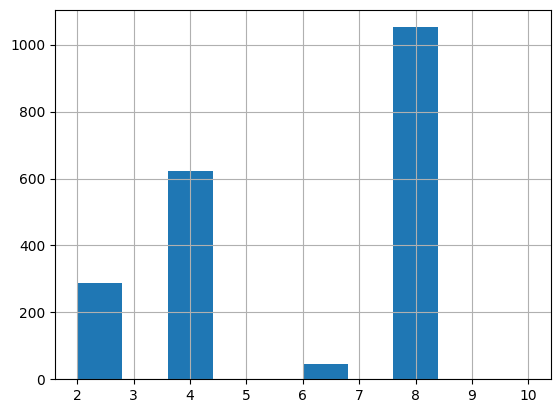

In [111]:
X_train['CPU'].hist()

It seems that Average is a good amount for being replaced with NaN values

In [192]:
X_train.fillna(np.mean(X_train['CPU']), inplace=True)

Convert non-numerical Columns into numirecal values 

In [193]:
le = LabelEncoder()

In [194]:
X_train['3G'] = le.fit_transform(X_train['3G'])
X_train['4G'] = le.fit_transform(X_train['4G'])
X_train['5G'] = le.fit_transform(X_train['5G'])
X_train['Status'] = le.fit_transform(X_train['Status'])
X_train['SIM'] = le.fit_transform(X_train['SIM'])
X_train['Display Type'] = le.fit_transform(X_train['Display Type'])
X_train['ratio'] = le.fit_transform(X_train['ratio'])
X_train['Colors_count'] = le.fit_transform(X_train['Colors_count'])
X_train['Loudspeaker'] = le.fit_transform(X_train['Loudspeaker'])
X_train['3.5mm jack'] = le.fit_transform(X_train['3.5mm jack'])
X_train['Chipset_type'] = le.fit_transform(X_train['Chipset_type'])
X_train['Card_slots'] = le.fit_transform(X_train['Card_slots'])
X_train['Bluetooth_version'] = le.fit_transform(X_train['Bluetooth_version'])

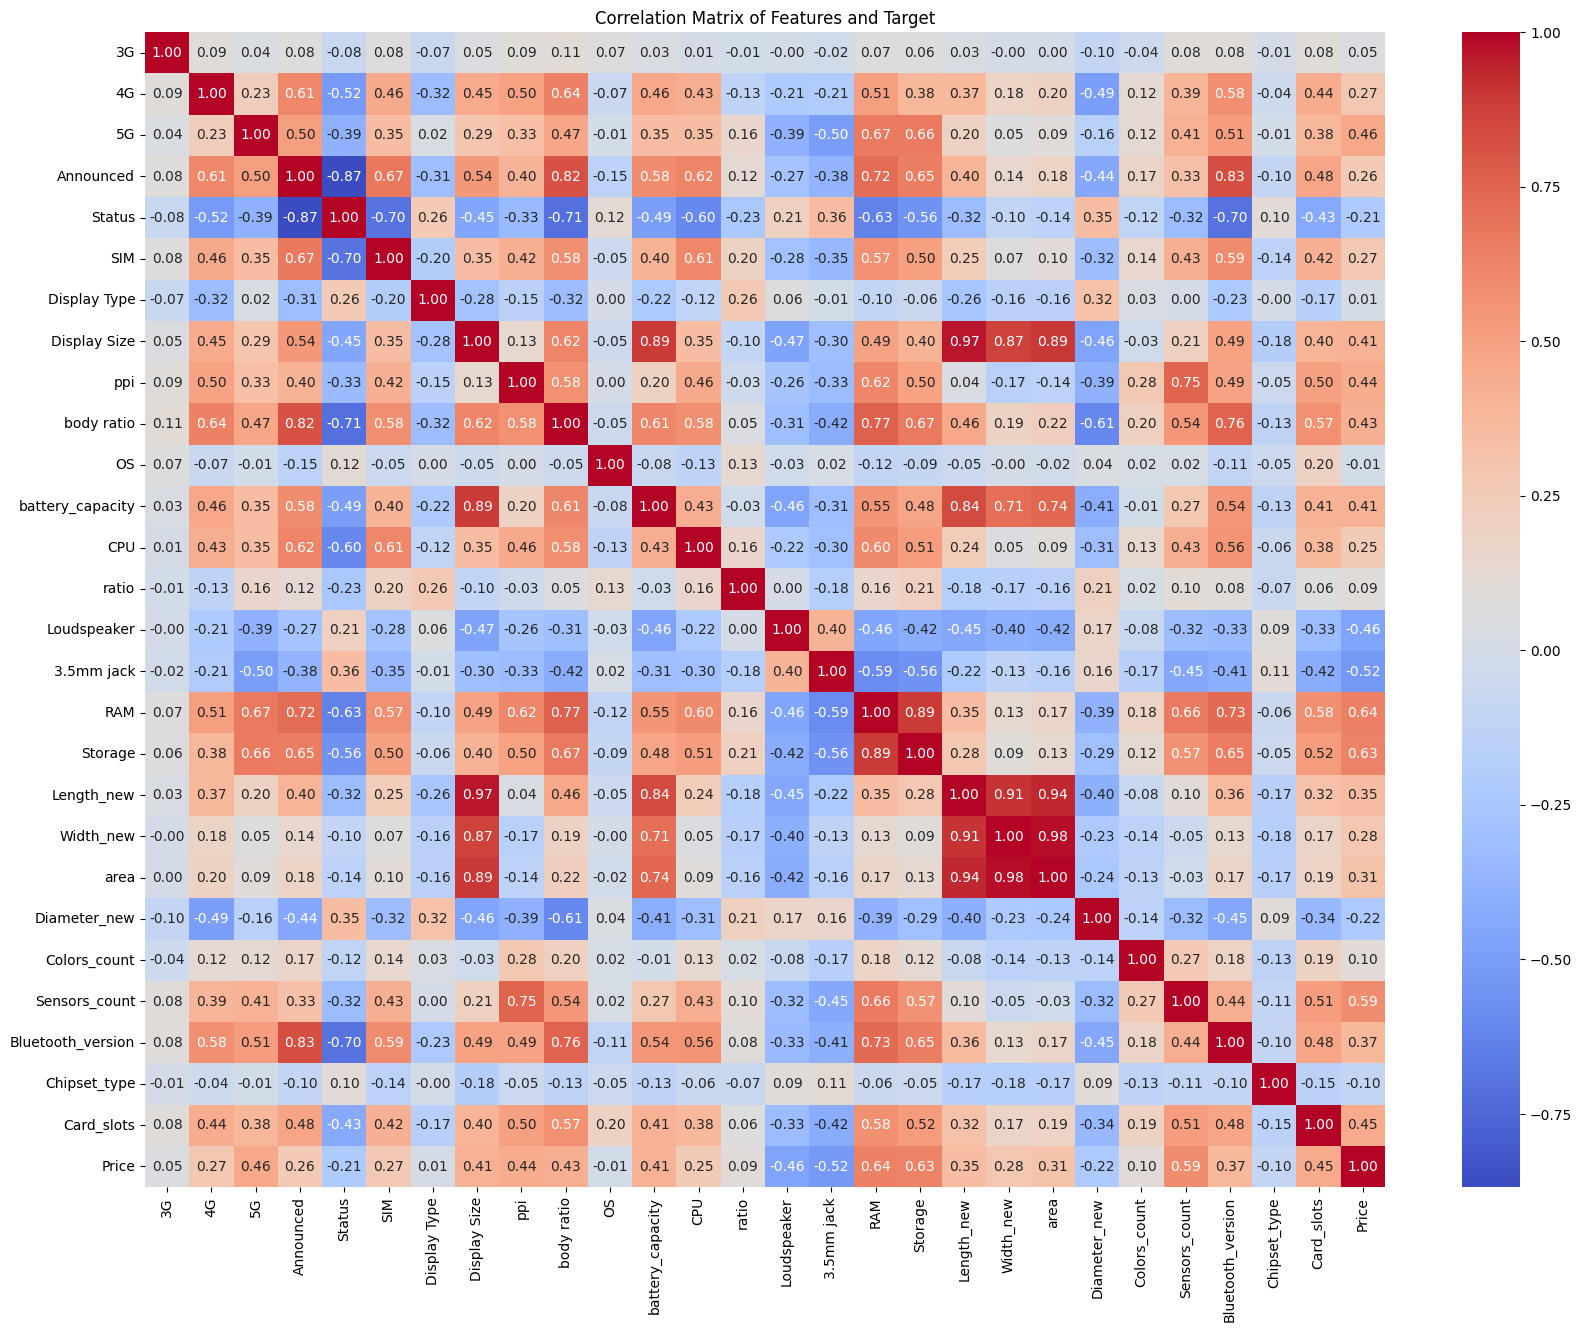

In [195]:
corr_checking = X_train.copy()
corr_checking['Price'] = y_train

correlation_matrix = corr_checking.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()


In [196]:
correlation_threshold = 0.1  # This threshold can be adjusted
correlation_with_target = correlation_matrix['Price'].abs()
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
selected_features.remove('Price')  # Remove target variable from features
selected_features

['4G',
 '5G',
 'Announced',
 'Status',
 'SIM',
 'Display Size',
 'ppi',
 'body ratio',
 'battery_capacity',
 'CPU',
 'Loudspeaker',
 '3.5mm jack',
 'RAM',
 'Storage',
 'Length_new',
 'Width_new',
 'area',
 'Diameter_new',
 'Sensors_count',
 'Bluetooth_version',
 'Card_slots']

In [197]:
X_selected = X_train[selected_features]

Train data pipeline

Now perform chages on test data

In [198]:
X_test['Length'] = X_test['Length'].apply(toFloat)
X_test['Width'] = X_test['Width'].apply(toFloat)
X_test['Length_new'] = X_test['Length'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_test['Width_new'] = X_test['Width'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_test['area'] = X_test['Length_new']*X_test['Width_new']
X_test['Diameter'] = X_test['Diameter'].apply(DtoFloat)
X_test['Diameter_new'] = X_test['Diameter'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['Display Type'] = X_test['Display Type'].apply(display_type)
X_test['Display Size'].apply(lambda x: round(x)).value_counts()
X_test['ppi'] = X_test['ppi'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['body ratio'] = X_test['body ratio'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['battery_capacity'] = X_test['battery_capacity'].apply(lambda x: int(math.ceil(float(x) / 1000.0)) * 1000)
X_test['Colors_count'] = X_test['Colors'].apply(CountColor)
X_test['Sensors_count'] = X_test['Sensors'].apply(CountColor)   
X_test['Bluetooth_version'] = X_test['Bluetooth'].apply(extract_bluetooth_version)
X_test['Chipset_type'] = X_test['Chipset'].apply(extract_chipset)
X_test['Card_slots'] = X_test['Card slot'].apply(card_slot_data)
X_test['OS'] = X_test['OS'].apply(os_category)
X_test.drop(['Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 
           'pixel', 'WLAN', 'Network','Internal', 'Card slot', 'Length', 'Width',
           'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'], axis=1, inplace=True)
X_test.fillna(np.mean(X_test['CPU']), inplace=True)
X_test['3G'] = le.fit_transform(X_test['3G'])
X_test['4G'] = le.fit_transform(X_test['4G'])
X_test['5G'] = le.fit_transform(X_test['5G'])
X_test['Status'] = le.fit_transform(X_test['Status'])
X_test['SIM'] = le.fit_transform(X_test['SIM'])
X_test['Display Type'] = le.fit_transform(X_test['Display Type'])
X_test['ratio'] = le.fit_transform(X_test['ratio'])
X_test['Colors_count'] = le.fit_transform(X_test['Colors_count'])
X_test['Loudspeaker'] = le.fit_transform(X_test['Loudspeaker'])
X_test['3.5mm jack'] = le.fit_transform(X_test['3.5mm jack'])
X_test['Chipset_type'] = le.fit_transform(X_test['Chipset_type'])
X_test['Card_slots'] = le.fit_transform(X_test['Card_slots'])
X_test['Bluetooth_version'] = le.fit_transform(X_test['Bluetooth_version'])
X_test_selected = X_test[selected_features]

### check Price Data

In [199]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(t_test)

<Axes: >

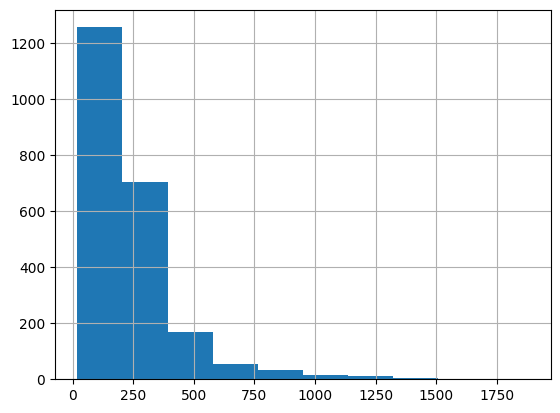

In [200]:
y_train['Price'].hist()

In [201]:
y_train['Price'].describe()

count    2253.000000
mean      243.766747
std       196.144122
min        20.000000
25%       129.990000
50%       190.000000
75%       290.000000
max      1880.000000
Name: Price, dtype: float64

In [203]:
# X_tr_scaled = pd.DataFrame(X_tr_scaled)
# X_val_scaled = pd.DataFrame(X_val_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)


# X_tr_scaled.to_csv('./price_train_cleared.csv', index=False, header=True)
# X_val_scaled.to_csv('./price_val_cleared.csv', index=False, header=True)
# X_test_scaled.to_csv('./price_test_cleared.csv', index=False, header=True)

X_train.to_csv('./price_train_cleared.csv', index=False, header=True)
X_test.to_csv('./price_test_cleared.csv', index=False, header=True)


y_train.to_csv('./target_train.csv', index=False, header=True)
y_test.to_csv('./target_test.csv', index=False, header=True)